In [102]:
import pandas as pd
import pylab as plt
import numpy as np
%matplotlib inline
plt.style.use('fivethirtyeight')

In [40]:
h1n1=pd.read_csv('h1n1a',sep=" ",names=['acc','acc1','ent'],index_col=0)
h3n2=pd.read_csv('h3n2a',sep=" ",names=['acc','acc1','ent'],index_col=0)
h5n1=pd.read_csv('h5n1aa',sep=" ",names=['acc','acc1','ent'],index_col=0)
#h1n1.index=h1n1.index.values.astype(str)
#h5n1.index=h5n1.index.values.astype(str)
#h3n2.index=h3n2.index.values.astype(str)


In [68]:
h3n2.columns=['acc_h3n2','acc1_h3n2','ent_h3n2']
IF=h5n1.join(h1n1,rsuffix='_h1n1',lsuffix='_h5n1').join(h3n2)

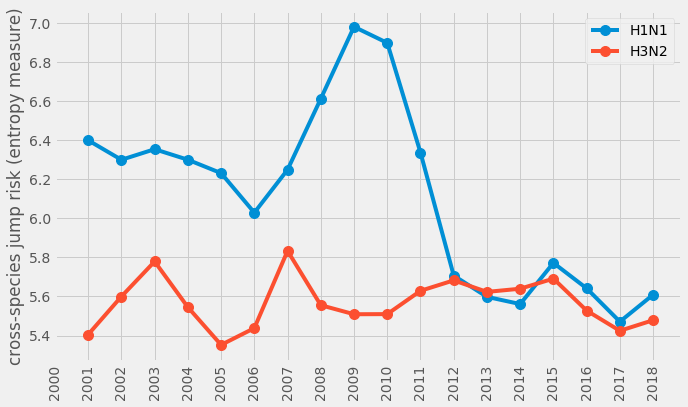

In [131]:
plt.figure(figsize=[10,6])
#IF[['ent_h1n1','ent_h5n1','ent_h3n2']].plot(kind='bar',ax=plt.gca())
#IF[['ent_h1n1','ent_h5n1','ent_h3n2']].plot(style='-ks',ax=plt.gca())
(1*IF[['ent_h1n1','ent_h3n2']]).drop(2000).ewm(alpha=.9).mean().plot(ax=plt.gca(),style='-o',ms=10)
#plt.gca().set_ylim(5,None)
plt.gca().legend(['H1N1','H3N2'])
plt.xticks(np.arange(2000, 2019,step=1), rotation=90);
plt.ylabel('cross-species jump risk (entropy measure)');
#

Text(0, 0.5, 'cross-species jump risk (classification measure)')

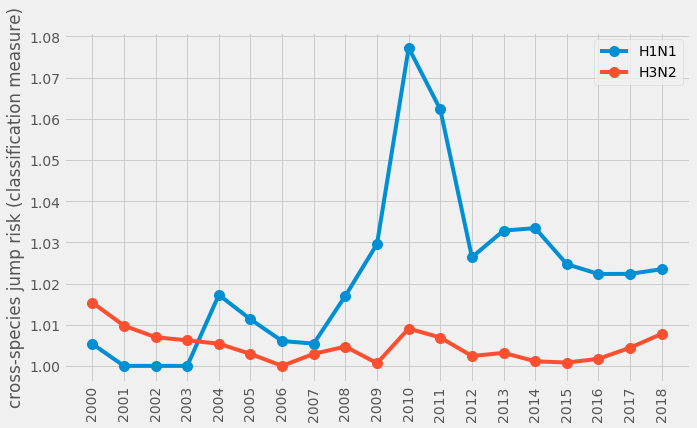

In [119]:
plt.figure(figsize=[10,6])
#IF[['ent_h1n1','ent_h5n1','ent_h3n2']].plot(kind='bar',ax=plt.gca())
#IF[['ent_h1n1','ent_h5n1','ent_h3n2']].plot(style='-ks',ax=plt.gca())
(1/IF[['acc_h1n1','acc_h3n2']]).plot(ax=plt.gca(),style='-o',ms=10)
plt.gca().legend(['H1N1','H3N2'])
plt.xticks(np.arange(2000, 2019,step=1), rotation=90);
plt.ylabel('cross-species jump risk (classification measure)')
#plt.gca().set_ylim(5,None)

Text(0, 0.5, 'cross-species jump risk (classification measure)')

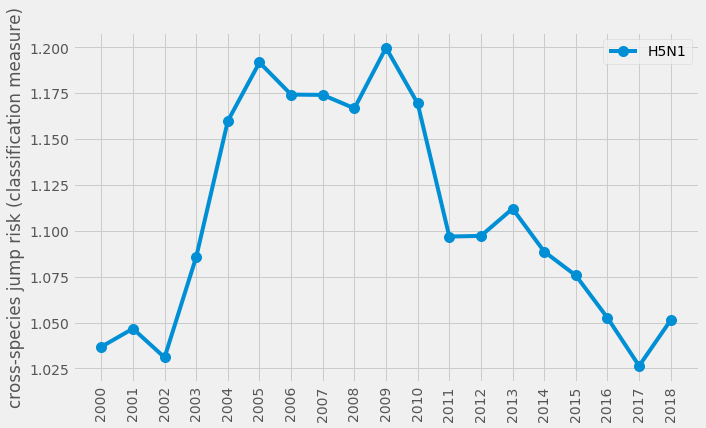

In [133]:
plt.figure(figsize=[10,6])
#IF[['ent_h1n1','ent_h5n1','ent_h3n2']].plot(kind='bar',ax=plt.gca())
#IF[['ent_h1n1','ent_h5n1','ent_h3n2']].plot(style='-ks',ax=plt.gca())
(1/IF[['acc_h5n1']]).ewm(alpha=.7).mean().plot(ax=plt.gca(),style='-o',ms=10)
plt.gca().legend(['H5N1'])
plt.xticks(np.arange(2000, 2019,step=1), rotation=90);
plt.ylabel('cross-species jump risk (classification measure)')
#plt.gca().set_ylim(5,None)

Text(0, 0.5, 'cross-species jump risk (classification measure)')

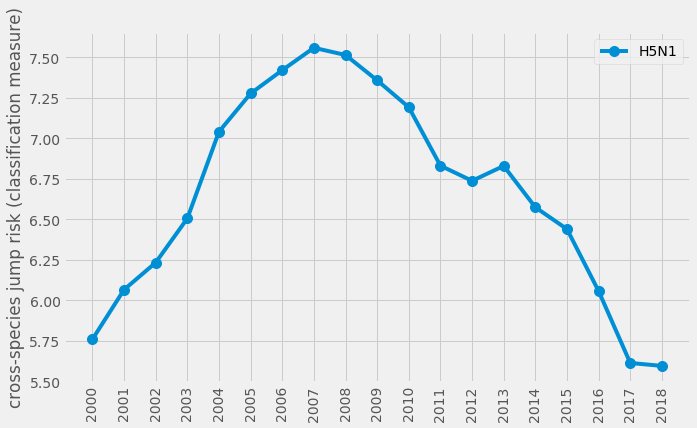

In [134]:
plt.figure(figsize=[10,6])
#IF[['ent_h1n1','ent_h5n1','ent_h3n2']].plot(kind='bar',ax=plt.gca())
#IF[['ent_h1n1','ent_h5n1','ent_h3n2']].plot(style='-ks',ax=plt.gca())
(IF[['ent_h5n1']]).ewm(alpha=.8).mean().plot(ax=plt.gca(),style='-o',ms=10)
plt.gca().legend(['H5N1'])
plt.xticks(np.arange(2000, 2019,step=1), rotation=90);
plt.ylabel('cross-species jump risk (classification measure)')
#plt.gca().set_ylim(5,None)

In [138]:
h1n1r=pd.read_csv('h1n1',sep=" ",names=['acc','acc1','ent'],index_col=0)
h3n2r=pd.read_csv('h3n2',sep=" ",names=['acc','acc1','ent'],index_col=0)
#h5n1=pd.read_csv('h5n1aa',sep=" ",names=['acc','acc1','ent'],index_col=0)
#h1n1.index=h1n1.index.values.astype(str)
#h5n1.index=h5n1.index.values.astype(str)
#h3n2.index=h3n2.index.values.astype(str)
#h3n2r.columns=['acc_h3n2','acc1_h3n2','ent_h3n2']
IFr=h1n1.join(h3n2r,lsuffix='_h1n1',rsuffix='_h3n2')

Text(0, 0.5, 'cross-species jump risk (classification measure)')

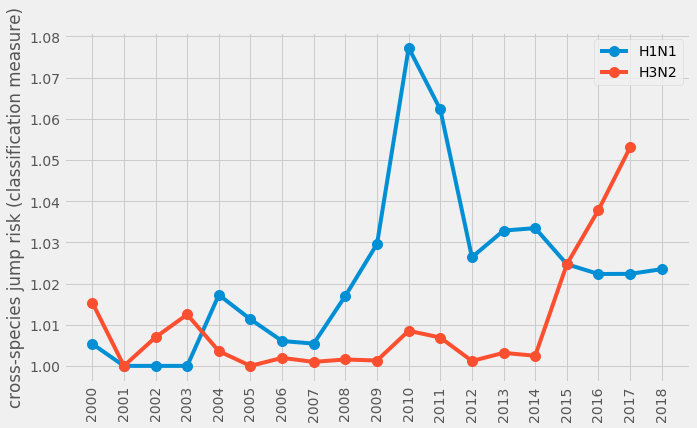

In [139]:
plt.figure(figsize=[10,6])
#IF[['ent_h1n1','ent_h5n1','ent_h3n2']].plot(kind='bar',ax=plt.gca())
#IF[['ent_h1n1','ent_h5n1','ent_h3n2']].plot(style='-ks',ax=plt.gca())
(1/IFr[['acc_h1n1','acc_h3n2']]).plot(ax=plt.gca(),style='-o',ms=10)
plt.gca().legend(['H1N1','H3N2'])
plt.xticks(np.arange(2000, 2019,step=1), rotation=90);
plt.ylabel('cross-species jump risk (classification measure)')
#plt.gca().set_ylim(5,None)

In [140]:
jf=pd.read_csv('./ntb/ntb/jump_risk_to_humans.csv')

In [147]:
JF=jf.transpose().drop(['subtype','target','source'])

In [149]:
JF.columns=['h5n1','h3n2','h1n1']

In [152]:
JF.index=JF.index.values.astype(int)

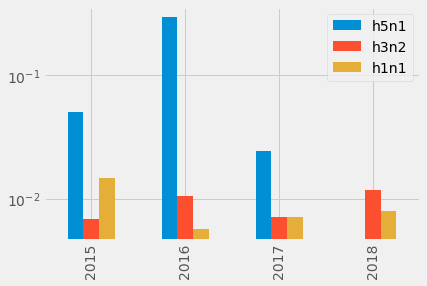

In [161]:
(1/JF.loc[[2015,2016,2017,2018]]).plot(kind='bar',logy=True)

Text(0, 0.5, 'future risk (qnet measure)')

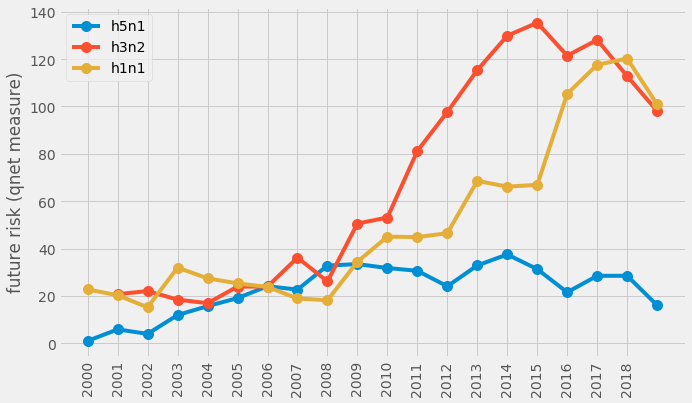

In [166]:
plt.figure(figsize=[10,6])
#IF[['ent_h1n1','ent_h5n1','ent_h3n2']].plot(kind='bar',ax=plt.gca())
#IF[['ent_h1n1','ent_h5n1','ent_h3n2']].plot(style='-ks',ax=plt.gca())
JF.ewm(alpha=.35).mean().plot(ax=plt.gca(),style='-o',ms=10)
#plt.gca().legend(['H1N1','H3N2'])
plt.xticks(np.arange(2000, 2019,step=1), rotation=90);
plt.ylabel('future risk (qnet measure)')
#plt.gca().set_ylim(5,None)